Afonso Lavado | 20220631@novaims.unl.pt

Afonso Reyna | 20191197@novaims.unl.pt

Fernando Cruz | 20220646@novaims.unl.pt

Mariana Rodrigues | 20220627@novaims.unl.pt

Pedro Fernandes | 20220592@novaims.unl.pt 

Data Source | https://drive.google.com/file/d/1bs3GM_j9XScOEm-mNOG3ZEYg7-NVTc1C/view?usp=share_link




---




---

# 1- Optimization Problem Formalization
## Objective: 
Classify images of sports into 10 different categories using a Deep Learning model.
## Inputs:
A set of training images of size 50787.

A set of testing images of size 21765.

A set of validation of 20%.
##Outputs:
A Deep Learning model that classifies images of sports into 10 different categories.
###Constraints:
The model must be trained using only the training_set.

The accuracy of the model on the testing set must be maximized.

The model must not overfit the training data.

## Conclusion:
Our optimization problem can be solved by selecting an appropriate  algorithm, such as convolutional neural networks (CNNs), and tuning its hyperparameters on the training set. The performance of the trained model can be evaluated on the testing set, and the hyperparameters can be adjusted to maximize the accuracy on the testing set.

---





# 2 - Initial Project Context
The Games dataset cointaining 100 000 Gameplay images of 175 Video games across 10 sports Genres - AMERICAN FOOTBALL, BASKETBALL, BIKE RACING, CAR RACING, FIGHTING, HOCKEY, SOCCER, TABLE TENNIS, TENNIS, VOLLEYBALL. 


##Classes:
AMERICAN FOOTBALL, BASKETBALL, BIKE RACING, CAR RACING, FIGHTING, HOCKEY, SOCCER, TABLE TENNIS, TENNIS, VOLLEYBALL


##Goal: 
Predict the class of the Sport.


##Addictional Information:
train_split.csv - Csv file with the path to the training set images.

test_split.csv - Csv file with the path to the test set images.

Sports10_clean.zip - It is a zipped folder containing the training image dataset and testing datasets. The weight of this folder is 9,08 GB. Download Sports10_clean.zip

## Expected outcomes:
Sport class


---




---

# 3 - Summary and Findings
## 3.1 - Summary
---
This work aims to develop a Deep Learning project where we apply some topics covered during the classes. This notebook aims to explore the dataset by doing some data preparations and visualizations. We started by creating different folders for each class and split our dataset in training, validation and test sets.



This dataset contains 10000 images for all sports in our dataset, which althought, consists in a balanced dataset.

- We did some relevant image distribution exploration, such as: image distribution in training and testing set, and Width, height and area distributions.

---
## 3.2 - Findings
After running the entire notebook, we could get some conclusions about our dataset that were very important to guide our next steps, such as understanding the best transformations, according to the image distributions.
- Balanced dataset;
- Balanced distribution number of images in training set.
- Unbalanced or less balanced distribution of images in testing set. Car Racing and Table tennis have less representativity comparing with the other sports.
- Very unbalanced width distribution in training set. The biggest frequency happens with width=1250 with more than 40000 records, while the second biggest happens with width=600 for more than 15000 images. Width average = 1012,76.
- Hight distribution - highest frequency at heights 700 and 300, that indicates that the majority of the images have a height in the range of 300 to 700 pixels.
- Area distribution - 

---



# 4 - Imports and acessing the dataset

## 4.1 - Imports

In [1]:
# General libraries:
import os
import time
import shutil
import gdown
import random
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Image library:
from PIL import Image

# Keras library:
import tensorflow as tf
from tensorflow import keras

#from tensorflow.data import Dataset

# from tensorflow.keras import datasets
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

## 4.2 - Dataset

In [ ]:
##################################################################################
################################### DO NOT RUN ###################################
##################################################################################

Unzip the dataset

In [ ]:
# Set the machine
#gdrive = True
# Set the connection string
#path = "/content/drive/MyDrive/DL/"
#main_folder, training_folder, testing_folder = "Sports10/", "training_set/", "test_set/"
# If using Google Drive
#if gdrive:
    # Setup drive
 #   from google.colab import drive
  #  drive.mount('/content/drive')        
    # Transfer zip dataset to the current virtual machine
   # t0 = time.time()
    #shutil.copyfile(path + 'Sports10.zip', 'Sports10.zip')
    # Extract files
    #zip_ = zipfile.ZipFile('Sports10.zip')
    #zip_.extractall()
    #zip_.close()
    #print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    #path = ""

def show_sample_images(folder_directory, class_):

1.   Item de lista
2.   Item de lista


    # Build a connection string
    full_path = folder_directory + class_ + "/"
    # Get a set of random images
    images = random.sample(os.listdir(full_path), 4)
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        img = mpimg.imread(full_path + img)
        ax = plt.subplot(2, 2,  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape, class_))
        plt.axis("off")

show_sample_images(path + main_folder + training_folder, "cats")

Let's check if all classes have the same quantity of images, and find out the game that as the least images and that as the most images:

In [ ]:
## Defining path:
#main_folder = "/content/Sports10/"
#classes = ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]

# Defining integer variables:
#max_count_class = 0
#min_count_class = float('inf')
#max_count_game = 0
##min_count_game = float('inf')

# Defining string variables:
#max_class = ""
#min_class = ""
#max_game = ""
#min_game = ""

# for cycle to go through each class:
#for class_ in classes:
 # games_folders = os.listdir(main_folder+class_)
  # set a counter to calculate the number of images per class
  #count_class = 0
  
  # for cycle to through each game wihtin each class:
  #for game in games_folders:
    # set a counter to calculate the number of images per game 
   # count_game = len(os.listdir(main_folder+class_+"/"+game))
    #count_class += count_game
    
    # assigning min and max variables whenever a condition is met
    #if count_game < min_count_game:
     # min_count_game = count_game
      #min_game = class_+"/"+game
    #if count_game > max_count_game:
     # max_count_game = count_game
      #max_game = class_+"/"+game
  #if count_class > max_count_class:
   # max_count_class = count_class
    #max_class = class_
  #if count_class < min_count_class:
   # min_count_class = count_class
    #min_class = class_

# print results:
#print("Class with the least images:", min_class)
#print("Number of images:", min_count_class)
#print("Class with the most images:", max_class)
#print("Number of images:", max_count_class)
#print("Game with the least images:", min_game)
#print("Number of images:", min_count_game)
#print("Game with the most images:", max_game)
#print("Number of images:", max_count_game)

In [ ]:
# it seems that all classes have 10k images, despite their games have different number of images ()

In [ ]:
#train_split = pd.read_csv("/content/Sports10/train_split.csv")
#train_split

In [ ]:
#destination_directory_path = "/content/Sports10_clean/training_set/"
#original_directory_path = "/content/Sports10/"
#col_name = "class"
#for index, row in train_split.iterrows():
    # Copy the file to the destination directory
 #   shutil.copy(original_directory_path + row["filename"], destination_directory_path + row["class"]+"/")
    # Remove the file from the previous directory

In [ ]:
#val_split = pd.read_csv("/content/Sports10/val_split.csv")
#val_split

In [ ]:
#destination_directory_path = "/content/Sports10_clean/test_set/"
#original_directory_path = "/content/Sports10/"
#col_name = "class"
#for index, row in val_split.iterrows():
    # Copy the file to the destination directory
 #   shutil.copy(original_directory_path + row["filename"], destination_directory_path + row["class"]+"/")
    # Remove the file from the previous directory

# # Specify the path of the source directory
# src_dir = '/content/Sports10'

# # Specify the path of the destination directory
# dst_dir = '/content/Sports10_clean'

# # Specify the names of the folders you want to copy
# folder_names = ['test_set', 'training_set']


# for folder_name in folder_names:
#     src_path = os.path.join(src_dir, folder_name)
#     dst_path = os.path.join(dst_dir, folder_name)
#     try:
#         shutil.copytree(src_path, dst_path)
#         print(f"The folder {folder_name} has been successfully copied.")
#     except OSError as e:
#         print(f"Error: {folder_name} : {e.strerror}")

#!zip -r '/content/Sports10_clean.zip' '/content/Sports10_clean

In [ ]:
#!zip -r '/content/Sports10_clean.zip' '/content/Sports10_clean

In [ ]:
#shutil.copyfile('Sports10_clean.zip', "/content/drive/MyDrive/DL/Sports10_clean.zip")


# 3 - Exploration

In [2]:
#Set the machine
gdrive = True
#Set the connection string
path = "/content/drive/MyDrive/DL/"
main_folder, training_folder, testing_folder = "Sports10_clean/", "training_set/", "test_set/"
# If using Google Drive
if gdrive:
    # Setup drive
    from google.colab import drive
    drive.mount('/content/drive')        
    # Transfer zip dataset to the current virtual machine
    t0 = time.time()
    shutil.copyfile(path + 'Sports10_clean.zip', 'Sports10_clean.zip')
    # Extract files
    zip_ = zipfile.ZipFile('Sports10_clean.zip')
    zip_.extractall()
    zip_.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    path = ""

Mounted at /content/drive
File transfer completed in 163.874 seconds


In [19]:
rmdir /content/content/Sports10_clean/test_set/".ipynb_checkpoints"


rmdir: failed to remove '/content/content/Sports10_clean/test_set/.ipynb_checkpoints': No such file or directory


In [20]:
rmdir /content/content/Sports10_clean/training_set/".ipynb_checkpoints"

rmdir: failed to remove '/content/content/Sports10_clean/training_set/.ipynb_checkpoints': No such file or directory


In [5]:
image_size=(128, 128)
crop_to_aspect_ratio=True
label_mode="categorical" # describing the encoding of labels
validation_split=0.3 # reserve 30% of data for validation 
color_mode="rgb"
shuffle = True #shuffle the data
batch_size =64
seed=0

In [6]:
path = '/content/content/'
main_folder= 'Sports10_clean/'
training_folder = 'training_set/'
df_train, df_val = image_dataset_from_directory(path + main_folder + training_folder,  #define the data for train and for test
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                label_mode=label_mode,
                                                validation_split=validation_split, 
                                                color_mode=color_mode,
                                                shuffle=shuffle,
                                                batch_size=batch_size,
                                                subset='both',
                                                seed=seed)

print("\nObject's type:\t", )
print("Is it a tf.data.Dataset?\t R:",isinstance(df_train, tf.data.Dataset) )
print("Classes:",df_train.class_names )

Found 72552 files belonging to 10 classes.
Using 50787 files for training.
Using 21765 files for validation.

Object's type:	
Is it a tf.data.Dataset?	 R: True
Classes: ['AmericanFootball', 'Basketball', 'BikeRacing', 'CarRacing', 'Fighting', 'Hockey', 'Soccer', 'TableTennis', 'Tennis', 'Volleyball']


In [7]:
iter_train = iter(df_train)
batch_x_train, batch_y_train = iter_train.next()
print(batch_x_train.shape, batch_y_train.shape)
print("\nSample of x_train:", batch_x_train[0, 0:2, 0:2, 0])
print("\nSample of y_train:", batch_y_train[0:5])
print("Sample average of y_train:", tf.reduce_mean(batch_y_train))

(64, 128, 128, 3) (64, 10)

Sample of x_train: tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)

Sample of y_train: tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(5, 10), dtype=float32)
Sample average of y_train: tf.Tensor(0.1, shape=(), dtype=float32)


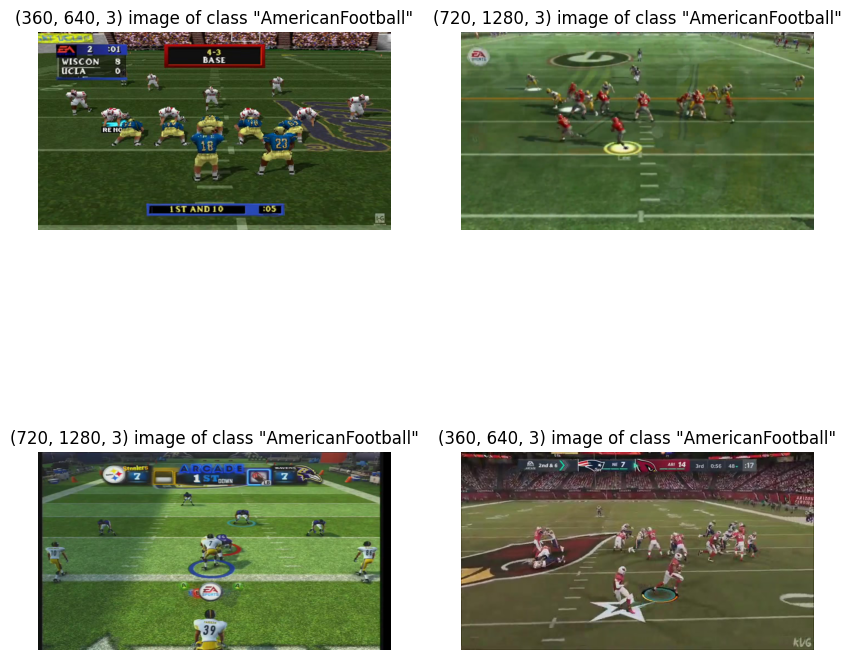

In [8]:
def show_sample_images(folder_directory, class_):
    # Build a connection string
    full_path = folder_directory + class_ + "/"
    # Get a set of random images
    images = random.sample(os.listdir(full_path), 4)
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        img = mpimg.imread(full_path + img)
        ax = plt.subplot(2, 2,  i + 1)
        plt.imshow(img)
        plt.title("{} image of class \"{}\"".format(img.shape, class_))
        plt.axis("off")

show_sample_images(path + main_folder + training_folder , "AmericanFootball")

After selecting a specific class, in this case, "AmericanFootball", it shows 4 randomly selected images with a 10x10 size from the selected class and then the title of each image is its shape and the class it belongs to.

In [9]:
tf.keras.backend.image_data_format()

'channels_last'

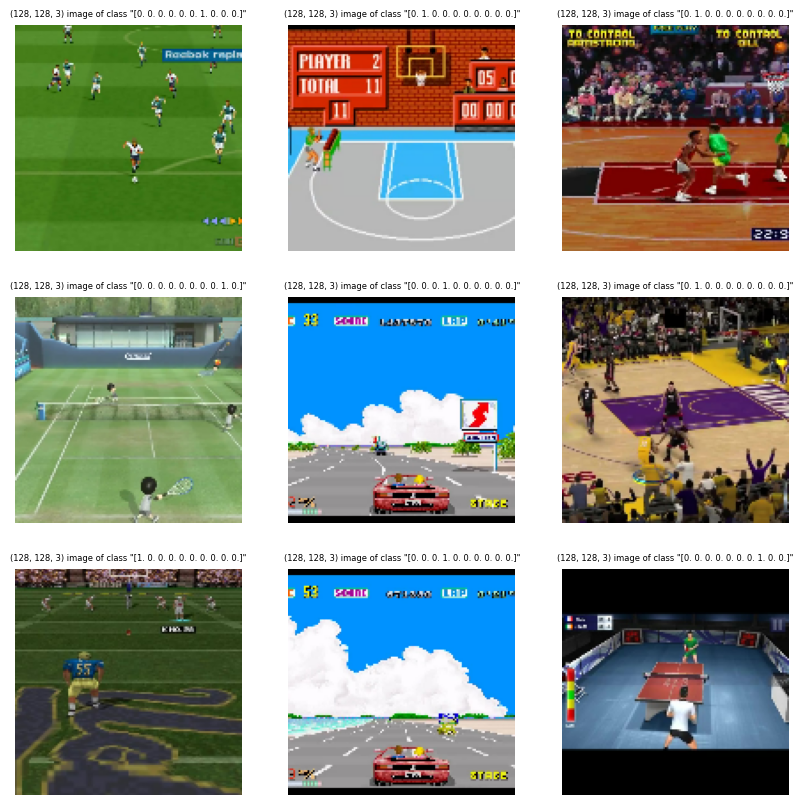

In [10]:
def show_sample_batch(ds, grid_size=(3, 3)):
    n_images = grid_size[0]*grid_size[1]
    # Get a batch via iteration
    iter_ = iter(ds)
    batch_x, batch_y = iter_.next()
    batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, (img, y) in enumerate(zip(batch_x, batch_y)):
        ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
        plt.imshow(tf.cast(img, tf.int32))
        plt.title("{} image of class \"{}\"".format(img.shape, y), size=6)
        plt.axis("off")

show_sample_batch(df_train)

This output allows us to visualize a grid of 4x4 images selected from the sports in df_train.
We iterate over each image and its corresponding label and then, we can see the image shape and the class of the image.

In [11]:
folder_path = "/content/content/Sports10_clean/training_set/AmericanFootball"

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        with Image.open(os.path.join(folder_path, filename)) as img:
            print(f"{filename}: {img.size}")

A saída de streaming foi truncada nas últimas 5000 linhas.
nfl10 0793.jpg: (640, 360)
nfl14mobile 0671.jpg: (640, 360)
fanaticalfootball 699.jpg: (1280, 720)
ncaa14 1069.jpg: (640, 360)
American Football Champs - Gameplay IOS & Android 143.jpg: (1280, 720)
ncaa99 496.jpg: (640, 360)
nflarcade 282.jpg: (1280, 720)
ncaa99 213.jpg: (640, 360)
ncaa19rain 492.jpg: (1280, 720)
nfl21 1101.jpg: (640, 360)
nfl21 0853.jpg: (640, 360)
fanaticalfootball 536.jpg: (1280, 720)
nfl21 0523.jpg: (640, 360)
nfl10 0601.jpg: (640, 360)
nfl12mobile 149.jpg: (480, 360)
nfl21mobile 222.jpg: (640, 360)
nfl14mobile 1021.jpg: (640, 360)
ncaa06 342.jpg: (1280, 720)
ncaa14 0876.jpg: (640, 360)
ncaa14 0309.jpg: (640, 360)
American Football Champs - Gameplay IOS & Android 367.jpg: (1280, 720)
abcmondaynight 291.jpg: (640, 360)
fanaticalfootball 466.jpg: (1280, 720)
allpro2k8 105.jpg: (1280, 720)
fanaticalfootball 471.jpg: (1280, 720)
nfl14mobile 0682.jpg: (640, 360)
nfl10 0830.jpg: (640, 360)
ncaa99 637.jpg: (640, 3

## 3.1 - Image Distributions

### 3.1.1 Number of images per sport in the dataset

In [12]:
path = "/content/content/Sports10_clean/"
sports = ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]
n_total = []
for sport in sports:
    n_train_c = len(os.listdir(path + training_folder + sport))
    n_test_c = len(os.listdir(path + testing_folder + sport))
    n_total_c = n_train_c + n_test_c
    n_total.append(n_total_c)
    print(f"This dataset has {n_total_c} images of {sport}.")

This dataset has 10000 images of AmericanFootball.
This dataset has 10000 images of Basketball.
This dataset has 10000 images of BikeRacing.
This dataset has 10001 images of CarRacing.
This dataset has 10000 images of Fighting.
This dataset has 10000 images of Hockey.
This dataset has 10000 images of Soccer.
This dataset has 10000 images of TableTennis.
This dataset has 10000 images of Tennis.
This dataset has 10000 images of Volleyball.


10000 images for all sports--> balanced dataset.

In [13]:
path = "/content/content/"
main_folder = "Sports10_clean/"
for split in [training_folder, testing_folder]:
    for c in ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]:
        n_train_c = len(os.listdir(path + main_folder + split + f"/{c}"))
        print(f"Nº of instances of class {c} in the {split}: {n_train_c}")

Nº of instances of class AmericanFootball in the training_set/: 7215
Nº of instances of class Basketball in the training_set/: 7351
Nº of instances of class BikeRacing in the training_set/: 7483
Nº of instances of class CarRacing in the training_set/: 8183
Nº of instances of class Fighting in the training_set/: 7144
Nº of instances of class Hockey in the training_set/: 6950
Nº of instances of class Soccer in the training_set/: 6728
Nº of instances of class TableTennis in the training_set/: 7831
Nº of instances of class Tennis in the training_set/: 6624
Nº of instances of class Volleyball in the training_set/: 7043
Nº of instances of class AmericanFootball in the test_set/: 2785
Nº of instances of class Basketball in the test_set/: 2649
Nº of instances of class BikeRacing in the test_set/: 2517
Nº of instances of class CarRacing in the test_set/: 1818
Nº of instances of class Fighting in the test_set/: 2856
Nº of instances of class Hockey in the test_set/: 3050
Nº of instances of class 

### 3.1.2 Training set

#### 3.1.2.1 Instances

Nº of instances of class AmericanFootball in training set: 7215
Nº of instances of class Basketball in training set: 7351
Nº of instances of class BikeRacing in training set: 7483
Nº of instances of class CarRacing in training set: 8183
Nº of instances of class Fighting in training set: 7144
Nº of instances of class Hockey in training set: 6950
Nº of instances of class Soccer in training set: 6728
Nº of instances of class TableTennis in training set: 7831
Nº of instances of class Tennis in training set: 6624
Nº of instances of class Volleyball in training set: 7043


<ipython-input-14-328bb8b835be>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=45)


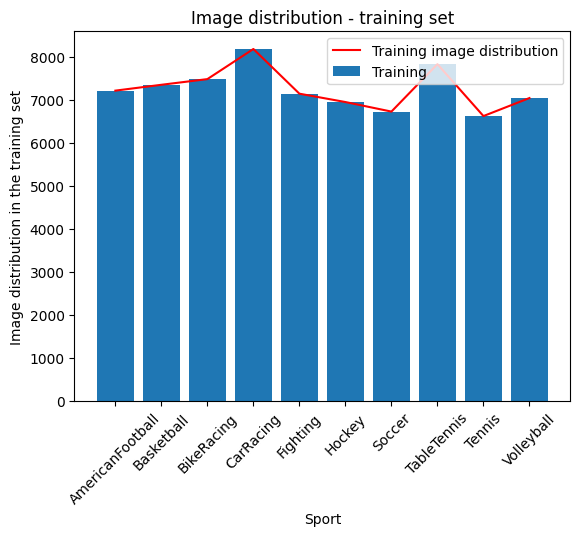

In [14]:
path = "/content/content/"
main_folder = "Sports10_clean/"
training_folder = "training_set"
sports = ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]
n_train = []
for sport in sports:
    n_train_c = len(os.listdir(path + main_folder + training_folder + f"/{sport}"))
    n_train.append(n_train_c)
    print(f"Nº of instances of class {sport} in training set: {n_train_c}")
# plot bar chart and line chart
fig, ax = plt.subplots()
ax.bar(sports, n_train, label="Training")
ax.plot(sports, n_train, color='red', label="Training image distribution")
ax.set_xticklabels(sports, rotation=45)
ax.set_xlabel("Sport")
ax.set_ylabel("Image distribution in the training set")
ax.set_title('Image distribution - training set')
ax.legend()
plt.show()

#### 3.1.2.2 - Width

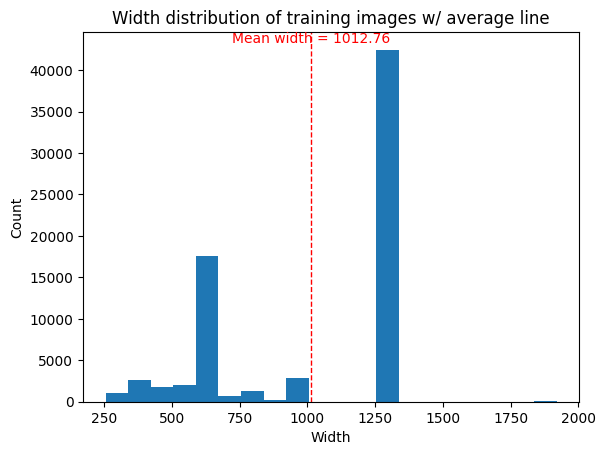

In [15]:
train_folder_path = '/content/content/Sports10_clean/training_set'
sport_names = os.listdir(train_folder_path)
widths = []
for sport in sport_names:
    sport_dir = os.path.join(train_folder_path, sport)
    for file_name in os.listdir(sport_dir):
        file_path = os.path.join(sport_dir, file_name)
        img = plt.imread(file_path)
        widths.append(img.shape[1])
plt.hist(widths, bins=20)
plt.xlabel("Width")
plt.ylabel("Count")
plt.title("Width distribution of training images w/ average line")
mean_width = sum(widths) / len(widths)
plt.axvline(mean_width, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_width, plt.ylim()[1], f"Mean width = {mean_width:.2f}", color='r', ha='center', va='top')
plt.show()


#### 3.1.2.3 Height

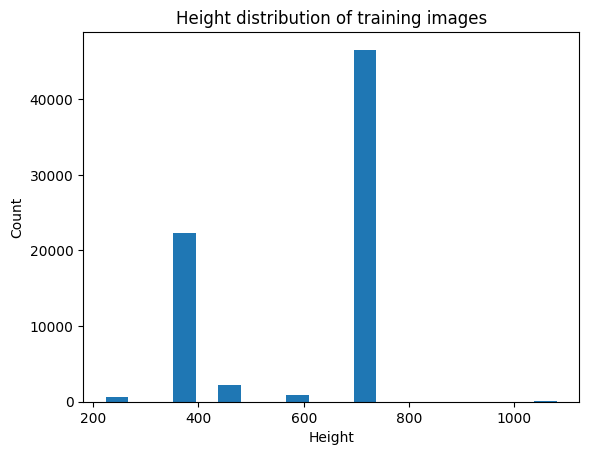

In [16]:
train_folder_path = '/content/content/Sports10_clean/training_set'
sport_names = os.listdir(train_folder_path)
heights = []
for sport in sport_names:
    sport_dir = os.path.join(train_folder_path, sport)
    for file_name in os.listdir(sport_dir):
        file_path = os.path.join(sport_dir, file_name)
        img = plt.imread(file_path)
        heights.append(img.shape[0])

plt.hist(heights, bins=20)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Height distribution of training images")
plt.show()

This height distribution plot with the highest frequency at heights 700 and 300 indicates that the majority of the images have a height in the range of 300 to 700 pixels. This plot can be useful for selecting appropriate image preprocessing techniques, such as resizing or cropping, to ensure that all images are of a consistent size before feeding them into the model.

We can conclude by analyzing the plot above, that the distribution of images in training set is balanced and very similar between all sports.

### 3.1.3 Testing set 

#### 3.1.3.1 Instances

Nº of instances of class AmericanFootball in testing set: 2785
Nº of instances of class Basketball in testing set: 2649
Nº of instances of class BikeRacing in testing set: 2517
Nº of instances of class CarRacing in testing set: 1818
Nº of instances of class Fighting in testing set: 2856
Nº of instances of class Hockey in testing set: 3050
Nº of instances of class Soccer in testing set: 3272
Nº of instances of class TableTennis in testing set: 2169
Nº of instances of class Tennis in testing set: 3376
Nº of instances of class Volleyball in testing set: 2957


<ipython-input-17-9fc6d98a883a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


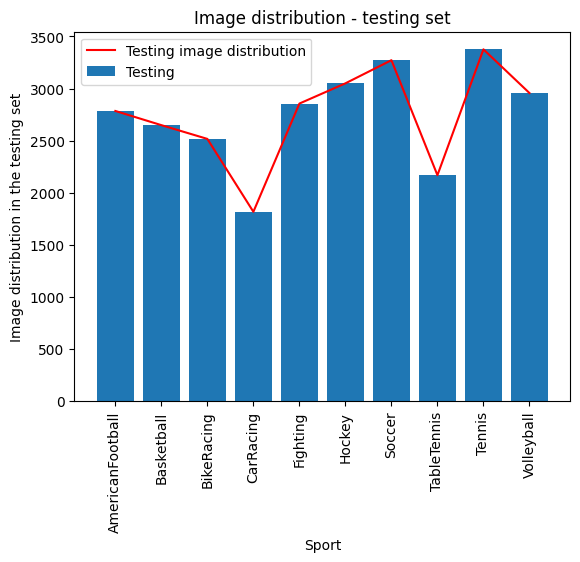

In [17]:
testing_folder = "test_set"
sports = ["AmericanFootball", "Basketball", "BikeRacing", "CarRacing", "Fighting", "Hockey", "Soccer", "TableTennis", "Tennis", "Volleyball"]
n_test = []
for sport in sports:
    n_test_c = len(os.listdir(path + main_folder + testing_folder + f"/{sport}"))
    n_test.append(n_test_c)
    print(f"Nº of instances of class {sport} in testing set: {n_test_c}")
fig, ax = plt.subplots()
ax.bar(sports, n_test, label="Testing ")
ax.plot(sports, n_test, color='red', label="Testing image distribution")
ax.set_xticklabels(sports, rotation=90)
ax.set_xlabel("Sport")
ax.set_ylabel("Image distribution in the testing set")
ax.set_title('Image distribution - testing set')
ax.legend()
plt.show()

We can conclude by analyzing the plot above, that the distribution of images in testing set is less balanced than in training set. Car Racing and Table tennis have less representativity in the testing set

In here we can conclude that the the distribution of width in training set images is not balanced. The biggest frequency happens with width=1250 with more than 40000 records, while the second biggest happens with width=600 for more than 15000 images. In the plot, we can also see the line that represents the width average, that is = 1012,76.

#### 3.1.3.3 Height

We were obtaining problems inside that folder, so re-run the remove code:

In [21]:
rmdir /content/content/Sports10_clean/test_set/CarRacing/".ipynb_checkpoints"

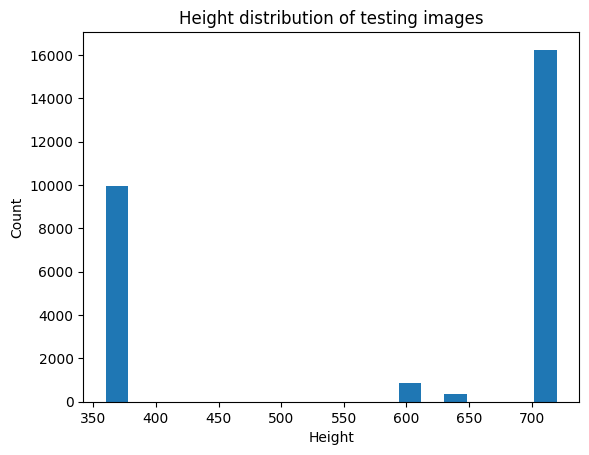

In [22]:

testing_folder = '/content/content/Sports10_clean/test_set'
sport_names = os.listdir(testing_folder)
heights = []
for sport in sport_names:
    sport_dir = os.path.join(testing_folder, sport)
    for file_name in os.listdir(sport_dir):
        file_path = os.path.join(sport_dir, file_name)
        img = plt.imread(file_path)
        heights.append(img.shape[0])

plt.hist(heights, bins=20)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Height distribution of testing images")
plt.show()

Here we can see that the most frequent heigh of the images is around 700 and there is no central value, which indicates that the dataset does not have consistent image heights.


### 3.1.5 - Area

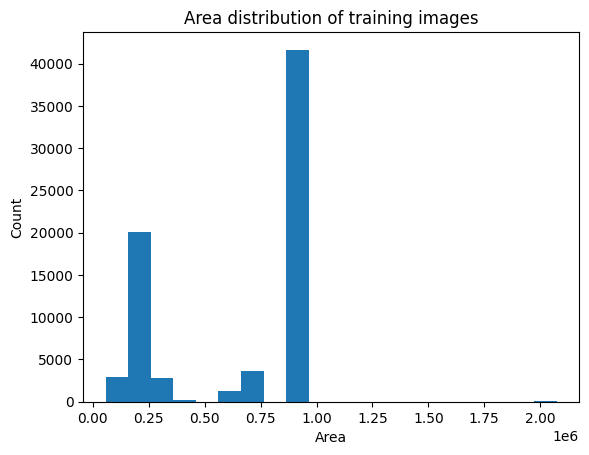

In [23]:
train_folder_path = '/content/content/Sports10_clean/training_set'
sport_names = os.listdir(train_folder_path)
areas = []
for sport in sport_names:
    sport_dir = os.path.join(train_folder_path, sport)
    for file_name in os.listdir(sport_dir):
        file_path = os.path.join(sport_dir, file_name)
        img = plt.imread(file_path)
        areas.append(img.shape[0] * img.shape[1])
plt.hist(areas, bins=20)
plt.xlabel("Area")
plt.ylabel("Count")
plt.title("Area distribution of training images")
plt.show()

By analysing the area distribution of the training images, we can conclude that there are a lot of images in our dataset with very high areas. It is also possible to see that there are 4 clusters. The first one is around 0.25x1e10, the second is around 0.70x1e10, the third one is around 0.90x1e10 and is the biggest one, having around 40000 images. The last one is around 2.0x1e10 but has a very few observations. 
